In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [6]:
df = pd.read_csv('77-stint-hard-clean.csv', parse_dates=['Date'])
# df = pd.read_csv('77-lap-630.csv', parse_dates=['Date'])
df.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2021-05-20 10:14:57.116,0 days 00:59:57.108000,NaN,483.667222,0 days 00:00:00,10791,259,6,100,False,8,interpolation,0.289905,0.000088,OnTrack,-7658,-6663,501
1,2021-05-20 10:14:57.132,0 days 00:59:57.124000,NaN,483.667222,0 days 00:00:00.016000,10588,260,7,100,False,8,car,1.448889,0.000441,OnTrack,-7659,-6652,501
2,2021-05-20 10:14:57.278,0 days 00:59:57.270000,NaN,483.667222,0 days 00:00:00.162000,10628,261,7,100,False,8,pos,12.047177,0.003667,OnTrack,-7666,-6547,502
3,2021-05-20 10:14:57.371,0 days 00:59:57.363000,31.0,483.667222,0 days 00:00:00.255000,10668,262,7,100,False,8,car,18.842778,0.005735,OnTrack,-7669,-6479,502
4,2021-05-20 10:14:57.498,0 days 00:59:57.490000,31.0,483.300556,0 days 00:00:00.382000,10685,263,7,100,False,8,pos,28.201140,0.008583,OnTrack,-7675,-6387,503


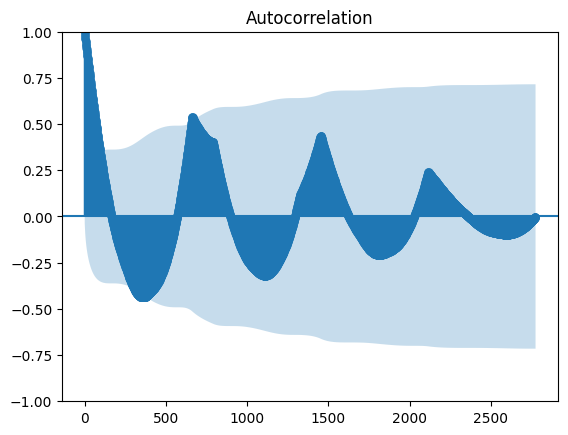

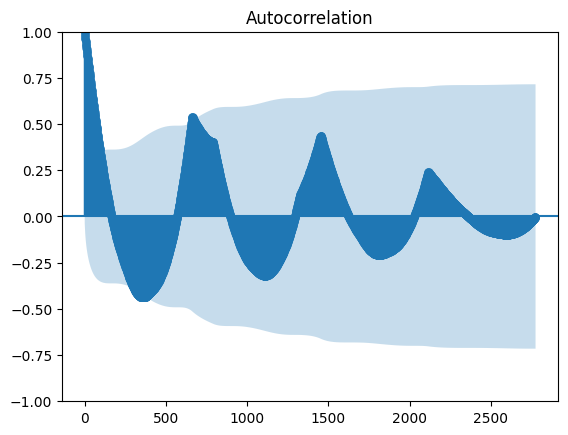

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Distance'], lags=2775)

In [35]:
print((df['Date'].iloc[750] - df['Date'].iloc[0]).seconds)
periods = (df['Date'].iloc[750] - df['Date'].iloc[0]).seconds / 24 / 60 / 60
periods

85


0.0009837962962962962

In [37]:
distance_shift = df['Distance'] - df['Distance'].shift()
distance_shift.loc[distance_shift < -3000]
distance_shift.loc[distance_shift < -3000] = 0
# distance_shift.cumsum().plot()
df['total_distance'] = distance_shift.cumsum()
# ().cumsum().plot()
# distance_shift.plot()

In [9]:
help(plot_acf)

Help on function plot_acf in module statsmodels.graphics.tsaplots:

plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)
    Plot the autocorrelation function
    
    Plots lags on the horizontal and the correlations on vertical axis.
    
    Parameters
    ----------
    x : array_like
        Array of time-series values
    ax : AxesSubplot, optional
        If given, this subplot is used to plot in instead of a new figure being
        created.
    lags : {int, array_like}, optional
        An int or array of lag values, used on horizontal axis. Uses
        np.arange(lags) when lags is an int.  If not provided,
        ``lags=np.arange(len(corr))`` is used.
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidenc

3285.1605015814653


<AxesSubplot: >

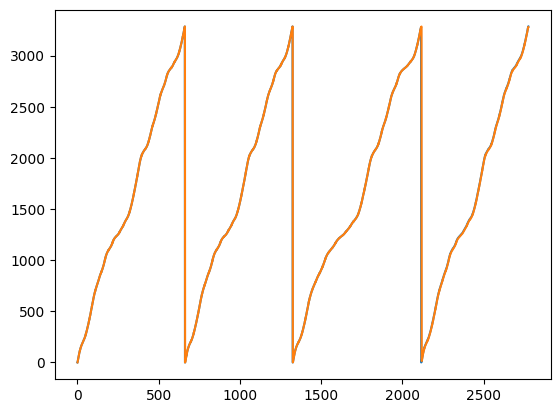

In [22]:
print(df['Distance'].max())
df['Distance'].plot()
(distance_shift.cumsum() % 3285.16 ).plot()

In [23]:
 df['Distance']

0          0.289905
1          1.448889
2         12.047177
3         18.842778
4         28.201140
           ...     
2771    3253.708627
2772    3267.528889
2773    3269.387421
2774    3284.728889
2775    3285.160502
Name: Distance, Length: 2776, dtype: float64

In [24]:
distance = pd.DataFrame()
distance['ds'] = df['Date']
distance['y'] = df['total_distance']

In [25]:
lap_start = distance[distance['y'] < 0.3]['ds']
print(lap_start)
# lap_start.index = [0,1,2,3]
# print(lap_start.iloc[1] - lap_start.iloc[0])
# print(lap_start.iloc[2] - lap_start.iloc[1])
# print(lap_start.iloc[3] - lap_start.iloc[2])

Series([], Name: ds, dtype: datetime64[ns])


In [26]:
start = distance.head(1)['ds'].values[0]
end = distance.tail(1)['ds'].values[0]

dt = end-start
print(dt)
# nanoseconds to days 0.00087678240740741
print(dt / 60 / 60 / 24 / 1000 / 1000 / 1000)

317542000000 nanoseconds
0 nanoseconds


11:48:54 - cmdstanpy - INFO - Chain [1] start processing
11:48:56 - cmdstanpy - INFO - Chain [1] done processing


                          ds          yhat    yhat_lower    yhat_upper
2853 2021-05-20 10:21:35.658  16553.546912  14378.984648  18938.531423
2854 2021-05-20 10:21:36.658  16583.543294  14398.831990  19018.044604
2855 2021-05-20 10:21:37.658  16615.647545  14374.685824  19103.796218
2856 2021-05-20 10:21:38.658  16649.165083  14370.653858  19177.786341
2857 2021-05-20 10:21:39.658  16684.730289  14373.505640  19270.169414


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,corner,corner_lower,corner_upper,lap,lap_lower,lap_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-20 10:14:57.116,-124.775764,-47.737878,22.997653,-124.775764,-124.775764,110.550047,110.550047,110.550047,5.622663,5.622663,5.622663,104.927385,104.927385,104.927385,0.0,0.0,0.0,-14.225716
1,2021-05-20 10:14:57.132,-123.891406,-46.579882,24.684548,-123.891406,-123.891406,110.550047,110.550047,110.550047,5.622663,5.622663,5.622663,104.927385,104.927385,104.927385,0.0,0.0,0.0,-13.341359
2,2021-05-20 10:14:57.278,-115.821645,-40.441308,36.172259,-115.821645,-115.821645,110.550047,110.550047,110.550047,5.622663,5.622663,5.622663,104.927385,104.927385,104.927385,0.0,0.0,0.0,-5.271598
3,2021-05-20 10:14:57.371,-110.681318,-36.970927,34.705094,-110.681318,-110.681318,110.550047,110.550047,110.550047,5.622663,5.622663,5.622663,104.927385,104.927385,104.927385,0.0,0.0,0.0,-0.131271
4,2021-05-20 10:14:57.498,-103.661732,-26.856850,41.372319,-103.661732,-103.661732,110.550047,110.550047,110.550047,5.622663,5.622663,5.622663,104.927385,104.927385,104.927385,0.0,0.0,0.0,6.888316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2021-05-20 10:21:35.658,16585.602943,14378.984648,18938.531423,14422.429411,18965.967985,-32.056031,-32.056031,-32.056031,-3.202098,-3.202098,-3.202098,-28.853933,-28.853933,-28.853933,0.0,0.0,0.0,16553.546912
2854,2021-05-20 10:21:36.658,16628.341251,14398.831990,19018.044604,14425.219797,19056.772290,-44.797957,-44.797957,-44.797957,-3.447301,-3.447301,-3.447301,-41.350656,-41.350656,-41.350656,0.0,0.0,0.0,16583.543294
2855,2021-05-20 10:21:37.658,16671.079559,14374.685824,19103.796218,14426.438878,19147.569770,-55.432013,-55.432013,-55.432013,-2.240760,-2.240760,-2.240760,-53.191253,-53.191253,-53.191253,0.0,0.0,0.0,16615.647545
2856,2021-05-20 10:21:38.658,16713.817867,14370.653858,19177.786341,14432.379562,19241.811750,-64.652784,-64.652784,-64.652784,-0.888079,-0.888079,-0.888079,-63.764704,-63.764704,-63.764704,0.0,0.0,0.0,16649.165083


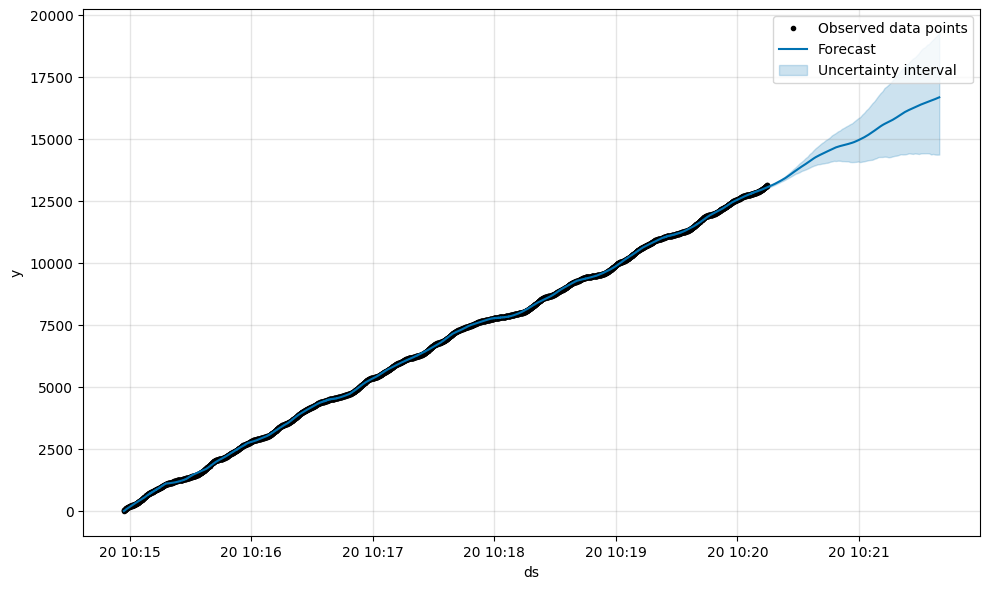

In [89]:
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
m.add_seasonality(name='lap', period=0.0009837962962962962, fourier_order=8)
m.add_seasonality(name='corner', period=0.00009837962962962962, fourier_order=8)
# m.add_seasonality(name='lap', period=0.00087678240740741, fourier_order=8)
m.fit(distance)

future = m.make_future_dataframe(periods=85, freq='S')
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
fig1 = m.plot(forecast, include_legend=True)
forecast

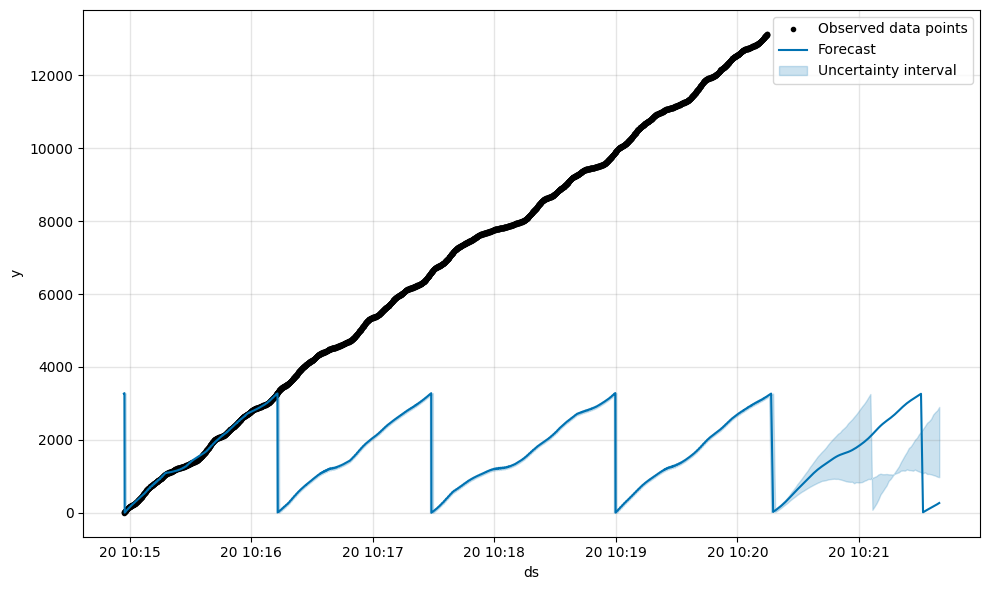

In [60]:
fig1 = m.plot(fdf.reset_index(), include_legend=True)

<AxesSubplot: xlabel='ds'>

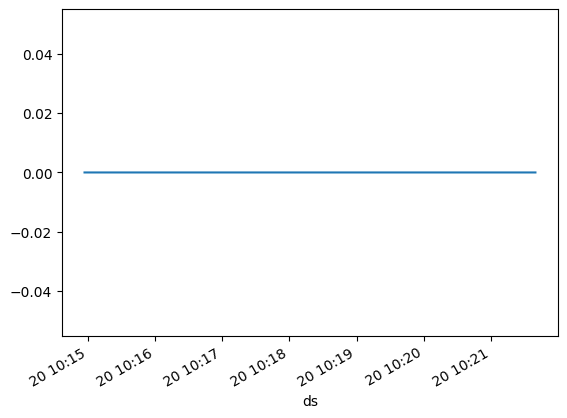

In [88]:
# forecast['y'] = forecast['y'] % 3285.16
fdf = forecast.copy()
columns = ['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'lap',
       'lap_lower', 'lap_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']
# for column in columns:
#     fdf[column] = fdf[column]  % 3285.16
fdf['yhat_mod'] = fdf['yhat'] % 3285.16
fdf['yhat_lower'] = (fdf['yhat_lower'] - fdf['yhat_mod']) 
fdf['yhat_upper'] = (fdf['yhat_upper'] - fdf['yhat_mod']) 
# fdf['yhat'] = fdf['yhat'] % 3285.16
# fig1 = m.plot(fdf, include_legend=True)
fdf.set_index('ds', inplace=True)
# ax = fdf['yhat_mod'].plot()
# fdf['yhat'].plot()
(fdf['trend'] + fdf['lap'] - fdf['yhat']).plot()
# fdf['lap'].plot()
# ax.fill_between(fdf.index, fdf['yhat_upper'], fdf['yhat_lower'], alpha=0.5)

In [44]:
help(m.add_seasonality)

Help on method add_seasonality in module prophet.forecaster:

add_seasonality(name, period, fourier_order, prior_scale=None, mode=None, condition_name=None) method of prophet.forecaster.Prophet instance
    Add a seasonal component with specified period, number of Fourier
    components, and prior scale.
    
    Increasing the number of Fourier components allows the seasonality to
    change more quickly (at risk of overfitting). Default values for yearly
    and weekly seasonalities are 10 and 3 respectively.
    
    Increasing prior scale will allow this seasonality component more
    flexibility, decreasing will dampen it. If not provided, will use the
    seasonality_prior_scale provided on Prophet initialization (defaults
    to 10).
    
    Mode can be specified as either 'additive' or 'multiplicative'. If not
    specified, self.seasonality_mode will be used (defaults to additive).
    Additive means the seasonality will be added to the trend,
    multiplicative means it will

In [45]:
# How many number of days is 1 lap?
x days = 75 seconds * 1 minute / 60 seconds * 1 hour / 60 minute * 1 day / 24 hours

SyntaxError: invalid syntax (1697446039.py, line 2)

In [198]:
90 / 60 / 60 / 24

0.0010416666666666667

In [230]:
help(m.plot)

Help on method plot in module prophet.forecaster:

plot(fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', figsize=(10, 6), include_legend=False) method of prophet.forecaster.Prophet instance
    Plot the Prophet forecast.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    include_legend: Optional boolean to add legend to the plot.
    
    Returns
    -------
    A matplotlib figure.



In [349]:
df = pd.DataFrame()
df['ds'] = np.arange('2023-02-02', '2023-02-03', dtype='datetime64[m]')
# np.arange(0, 1440/60, 0)

a1 = np.full((360,), 1)
a2 = np.full((360,), 0)
a3 = np.full((360,), 1)
a4 = np.full((360,), 0)
y = np.concatenate((a1, a2, a3, a4), axis=0)
print(len(a))
df['y'] = y
# help(np.array.fill)

1440


19:41:37 - cmdstanpy - INFO - Chain [1] start processing
19:41:38 - cmdstanpy - INFO - Chain [1] done processing


                      ds      yhat  yhat_lower  yhat_upper
2875 2023-02-03 00:22:56 -0.233715   -0.540045    0.062608
2876 2023-02-03 00:22:57 -0.233738   -0.513789    0.065022
2877 2023-02-03 00:22:58 -0.233761   -0.551791    0.058647
2878 2023-02-03 00:22:59 -0.233785   -0.556596    0.075451
2879 2023-02-03 00:23:00 -0.233808   -0.541671    0.059387


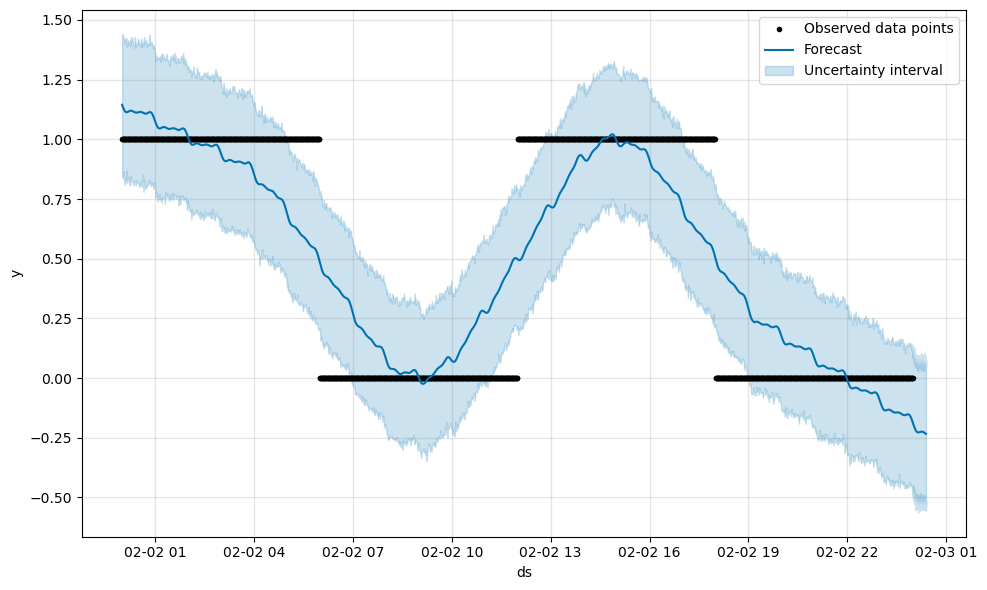

In [354]:



m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
m.add_seasonality(name='lap', period=1/24, fourier_order=3)
m.fit(df)

future = m.make_future_dataframe(periods=1440, freq='S')
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
fig1 = m.plot(forecast, include_legend=True)